# WeatherPy

---

## Generates Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt                                         # Assists with charting.
import pandas as pd                                                     # Assists with working with DataFrames.
import numpy as np                                                      # Helps generate an array of random numbers.
import requests                                                         # Helps requests data from the API's used.
import time                                                             # Assists with timed responses.
import json                                                             # Imports json format. 

# Imports the OpenWeatherMap API key
from api_keys import weather_api_key                                    # Api Key stored in annonymous file due to key sensitivity. 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy                                               # Python library storing cities and their lat/lon coordinates. 

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations that we will randonly generate.
lat_lngs = []

# Empty list for holding the cities names that will be collected from citipy.
cities = []

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)


# Creates a set of random lat and lng combinations.

# 'uniform' is used to return a random floating-point number that is greater than or equal to the specified low boundary, 
# and less than or equal to the specified high boundary.

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)                                      # zips both arrays created for lats/ lngs together. 

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [106]:
# First the json's format that will be worked with will be printed for ability to follow along with the next code block:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Create endpoint URL with each city
city_url = url+ "appid=" + weather_api_key + "&units=" + units + "&q=" + "guiuan"

city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 11.0333,
        "lon": 125.7247
    },
    "dt": 1685808004,
    "id": 1712206,
    "main": {
        "feels_like": 25.81,
        "grnd_level": 1009,
        "humidity": 97,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 24.75,
        "temp_max": 24.75,
        "temp_min": 24.75
    },
    "name": "Guiuan",
    "rain": {
        "1h": 0.24
    },
    "sys": {
        "country": "PH",
        "sunrise": 1685826803,
        "sunset": 1685872652
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 298,
        "gust": 1,
        "speed": 1.11
    }
}


In [107]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):                                    # if the record index is 0 or if index > 50, start new set.
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    #city_url = f"{url}appid={weather_api_key}&q={city}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | nurota
Processing Record 9 of Set 1 | nyurba
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | papao
Processing Record 14 of Set 1 | luau
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | quellon
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | ibateguara
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | vorg

Processing Record 37 of Set 4 | portalegre
Processing Record 38 of Set 4 | sengkang
Processing Record 39 of Set 4 | stanley
Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | san andres
Processing Record 42 of Set 4 | bukoba
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | strzelce krajenskie
Processing Record 45 of Set 4 | bethanie
Processing Record 46 of Set 4 | lepsy
Processing Record 47 of Set 4 | polyarnyy
Processing Record 48 of Set 4 | bam
Processing Record 49 of Set 4 | svetlyy
Processing Record 0 of Set 5 | conde
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | crane
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | amungan
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | la mira
Processing Record 8 of Set 5 | nikel
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | tazovsky
Processing Record 11 of Set 5 | v

Processing Record 32 of Set 8 | soderhamn
Processing Record 33 of Set 8 | kilindoni
Processing Record 34 of Set 8 | chiredzi
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | pangoa
Processing Record 38 of Set 8 | balqash
Processing Record 39 of Set 8 | oriximina
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | puerto aysen
Processing Record 42 of Set 8 | suoyarvi
Processing Record 43 of Set 8 | les avirons
Processing Record 44 of Set 8 | teguise
Processing Record 45 of Set 8 | semnan
Processing Record 46 of Set 8 | ishikawa
Processing Record 47 of Set 8 | bemidji
Processing Record 48 of Set 8 | oak grove
Processing Record 49 of Set 8 | san luis de la loma
Processing Record 0 of Set 9 | upata
Processing Record 1 of Set 9 | muisne
Processing Record 2 of Set 9 | celestun
Processing Record 3 of Set 9 | sambava
Processing Record 4 of Set 9 | mukalla
Processing Record 5 of Set 9 | dalandzadgad
Proces

Processing Record 18 of Set 12 | jiazi
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | zagora
Processing Record 21 of Set 12 | machico
Processing Record 22 of Set 12 | justo daract
Processing Record 23 of Set 12 | antsiranana
Processing Record 24 of Set 12 | coronel suarez
Processing Record 25 of Set 12 | anibare
City not found. Skipping...
Processing Record 26 of Set 12 | severo-yeniseyskiy
Processing Record 27 of Set 12 | mugia
Processing Record 28 of Set 12 | quechultenango
Processing Record 29 of Set 12 | kakata
Processing Record 30 of Set 12 | geraldton
Processing Record 31 of Set 12 | hajin
Processing Record 32 of Set 12 | turkmenbasy
Processing Record 33 of Set 12 | champerico
Processing Record 34 of Set 12 | santa elena de uairen
Processing Record 35 of Set 12 | ancud
Processing Record 36 of Set 12 | bolivar
Processing Record 37 of Set 12 | guaruja
Processing Record 38 of Set 12 | saimbeyli
Processing Record 39 of Set 12 | tromso
Processing R

In [108]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show Record Count.
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [110]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,59,52,7.77,NZ,1685808074
1,puerto ayora,-0.7393,-90.3518,26.97,91,76,3.58,EC,1685808074
2,edinburgh of the seven seas,-37.0676,-12.3116,14.04,65,97,1.45,SH,1685808074
3,san patricio,28.0170,-97.5169,29.40,58,85,4.31,US,1685808074
4,alice springs,-23.7000,133.8833,19.75,32,40,4.63,AU,1685807880


In [111]:
# Export the City_Data into a csv.
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [112]:
# Read saved data.
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,59,52,7.77,NZ,1685808074
1,puerto ayora,-0.7393,-90.3518,26.97,91,76,3.58,EC,1685808074
2,edinburgh of the seven seas,-37.0676,-12.3116,14.04,65,97,1.45,SH,1685808074
3,san patricio,28.0170,-97.5169,29.40,58,85,4.31,US,1685808074
4,alice springs,-23.7000,133.8833,19.75,32,40,4.63,AU,1685807880


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

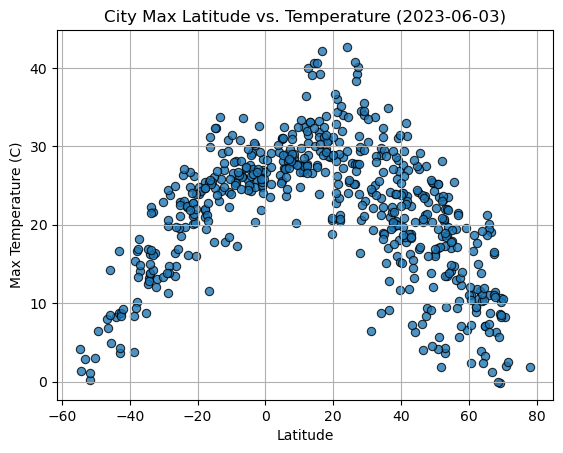

In [113]:
# Build scatter plot for latitude vs. temperature.
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

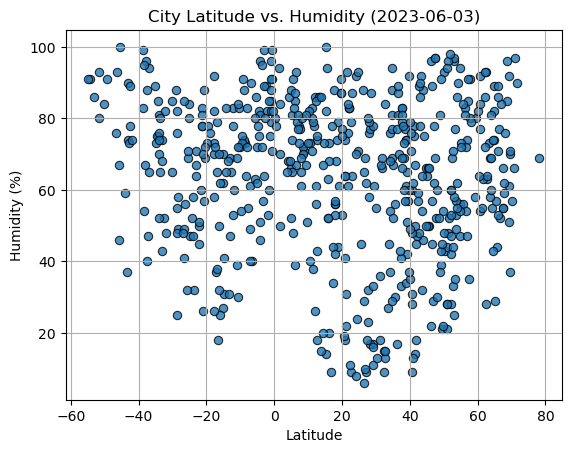

In [114]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("int")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

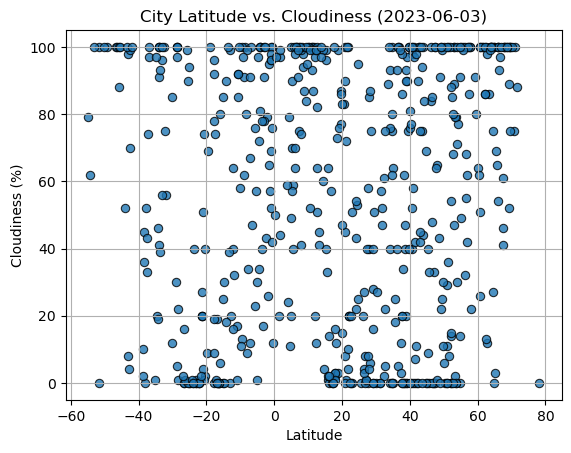

In [115]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("int")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

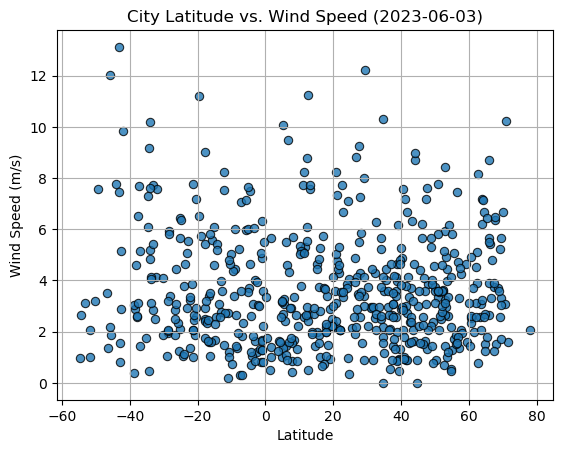

In [116]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress 

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df = northern_hemi_df.sort_values("Lat")
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
98,sao tome,0.3365,6.7273,26.76,80,50,3.36,ST,1685808093
386,muisne,0.6000,-80.0333,28.30,78,97,1.75,EC,1685808146
521,"laikit, laikit ii (dimembe)",1.4792,124.9735,23.47,94,20,0.51,ID,1685808171
331,ouesso,1.6136,16.0517,27.38,70,99,1.40,CG,1685808137
277,impfondo,1.6381,18.0667,25.13,84,97,1.02,CG,1685808127


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df  = southern_hemi_df.sort_values("Lat", ascending=False)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
417,kismayo,-0.3582,42.5454,25.88,82,12,5.51,SO,1685808152
415,loa janan,-0.5830,117.0950,24.07,99,42,0.82,ID,1685808037
62,hithadhoo,-0.6000,73.0833,28.34,71,100,2.24,MV,1685808086
1,puerto ayora,-0.7393,-90.3518,26.97,91,76,3.58,EC,1685808074
303,manokwari,-0.8667,134.0833,25.90,82,96,1.69,ID,1685808131


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is: 0.5459608342454036


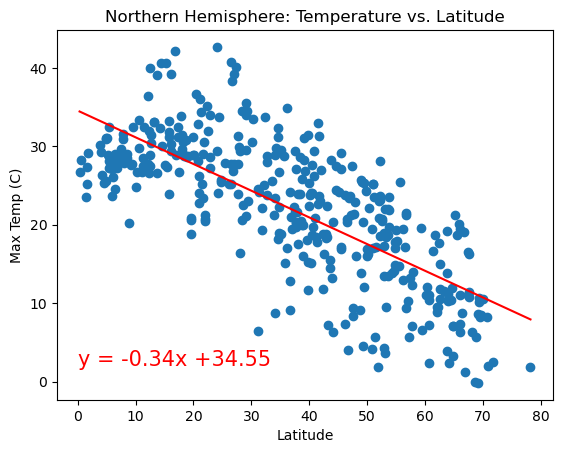

In [130]:
# Scatter plot.
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values)

# Headings. 
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(f" The r-value is: {rvalue**2}")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,2), fontsize=15, color="red")

plt.show()

 The r-value is: 0.7242048559694316


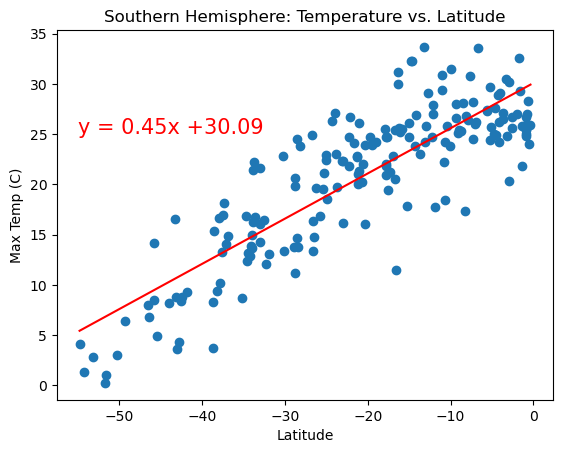

In [131]:
# Scatter plot.
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values)

# Headings. 
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(f" The r-value is: {rvalue**2}")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:**

**Northern Hemisphere: Temperature vs. Latitude**

Within the Northern Hemisphere, it has been observed that there is a negative relationship between latitude and the maximum temperature experienced on 06/03/2023, meaning that as latitude increases, the maximum temperature decreases. 

However, the above is simply a observation of the relationship, when looking at causation factors, linear regression will be utilised. The line of a equation calculated is: y = -0.34x + 34.55, this equation is the one which has the most data points within close proximity of all data points passing through it. The equation can help predict the maximum temperature for a given latitude in the Northern Hemisphere. An increase of one degree of latitude corresponds to a drop of 0.34 (C) in temperature.

Finally, the r-squared value calculated: 0.55 (2.d.p) is the coefficient of determination, this tells us that there the relationship between latitude and maximum temperature is explained 55% by the variations in this dataset.  

**Southern Hemisphere: Temperature vs. Latitude**

Within the Southern Hemisphere, it has been observed that there is a positive relationship between latitude and the maximum temperature experienced on 06/03/2023, meaning that as latitude increases, the maximum temperature also increases. 

However, as already mentioned, the above is simply a observation of the relationship, when looking at causation factors, linear regression will be utilised again. The line of a equation calculated is: y = 0.45x + 30.09, this equation is the one which has the most data points within close proximity of all data points passing through it. The equation can help predict the maximum temperature for a given latitude in the Southern Hemisphere. An increase of one degree of latitude corresponds to a 0.45 (C) temperature increase.

Finally, the r-squared value calculated: 0.72 (2.d.p) is the coefficient of determination, this tells us that there the relationship between latitude and maximum temperature is explained 72% by the variations in this dataset, this is a much clearer causation than when comparing the same factors in the Northern Hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

 The r-value is: 0.00024137612887590768


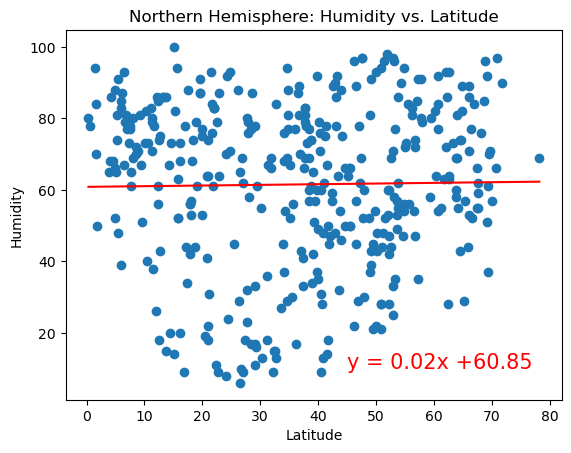

In [134]:
# Scatter plot.
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values)

# Headings. 
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(f" The r-value is: {rvalue**2}")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")

plt.show()

 The r-value is: 0.0027249563567899628


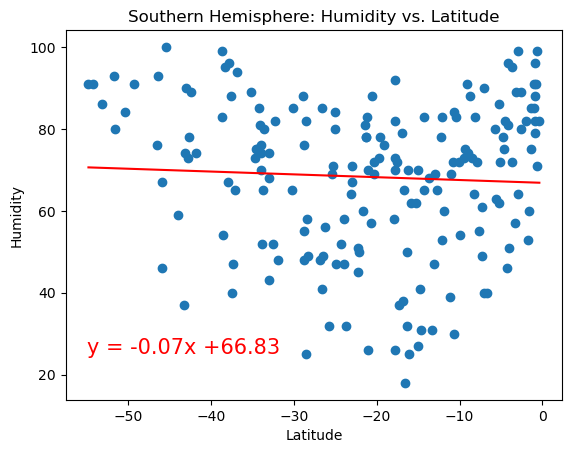

In [139]:
# Scatter plot.
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values)

# Headings. 
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(f" The r-value is: {rvalue**2}")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** 

**Humidity vs. Latitude**

Within both the Northern Hemisphere and Southern Hemisphere, it has been observed that there is a no/ very weak relationship between latitude and the Humidity experienced on 06/03/2023, the movement of latitude does not impact the movement in humidity significantly.

Given that there is a no/ very weak relationship, this would suggest that the causation statistics would come to a similar conclusion as there is not a signficant relationship in the first instance. 

The line of the equation calculated for the northern hemisphere was: y = 0.02x + 60.85.

- An increase of one degree of latitide would result in a increase of 0.02 in humidity. 

The r-sqaured value calculated for the northern hemisphere was 0.00 (2.d.p) renforcing the observation that the relationship between northern hemisphere latitude and humidity explains none of the variations in the data set.  

The line of the equation calculated for the southern hemisphere was: y = -0.07x + 66.83.

- An increase of one degree of latitide would result in a decrease of 0.07 in humidity. 

The r-sqaured value calculated for the southern hemisphere was also 0.00 (when rounded to 2.d.p) again, similar to the northern hemisphere, the relationship between southern hemisphere latitude and humidity explains none of the variations in the data set.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


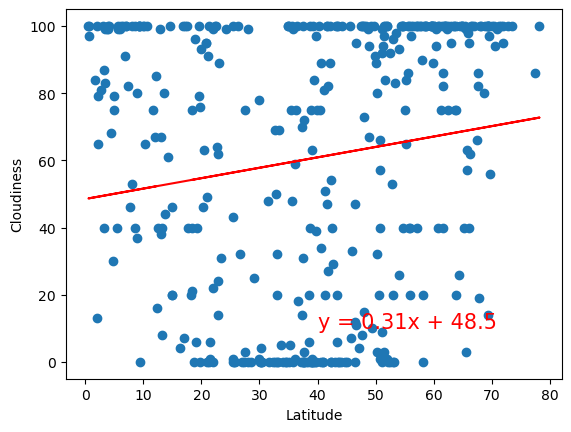

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


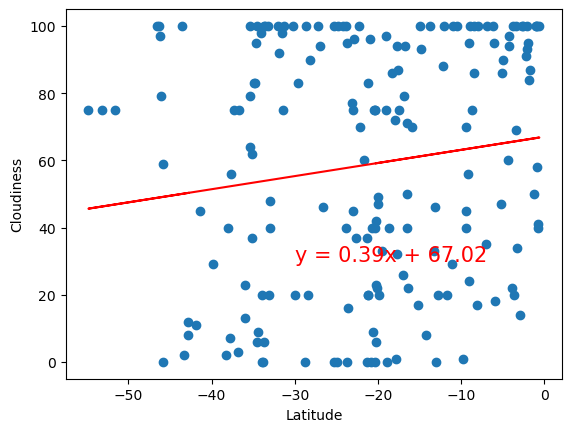

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


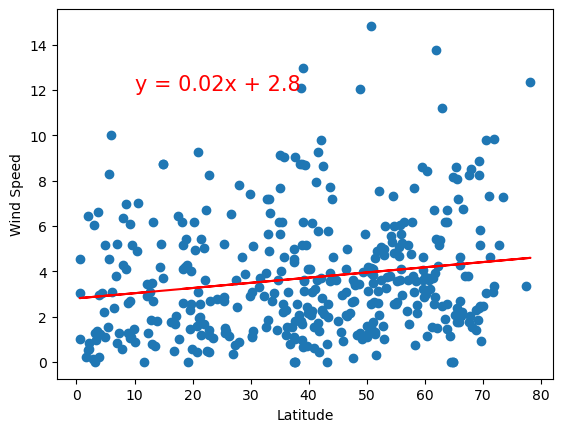

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


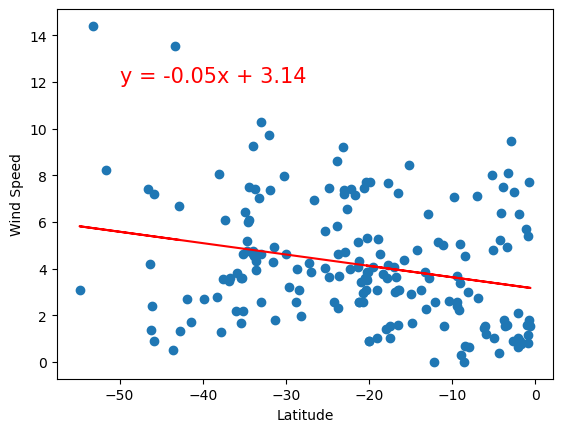

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE